In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os


zip_path = '/content/drive/My Drive/lab_reports_samples.zip'
extract_path = '/content/lab_reports_samples/lbmaske'


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")
print("Extracted files:", os.listdir(extract_path)[:5])


Extraction complete.
Extracted files: ['BLR-0425-PA-0040326_Lab Report Sunita_27-04-2025_0131-15_PM@G.pdf_page_11.png', 'GUR-0425-PA-0051725_Q-DEVKI19.04.20250001compressed_250427_1059@F.pdf_page_47.png', 'GUR-0425-PA-0056568_E-REPORTS_250427_1436@E.pdf_page_1.png', 'CHE-0425-PA-0014115_Q-Chandruquery_250427_1853@F.pdf_page_33.png', 'MUM-0125-PA-0001141_W2500438UNADKAT ASHWIN_27-04-2025_1002-19_AM.pdf_page_80.png']


In [3]:
!pip install fastapi uvicorn python-multipart pytesseract opencv-python-headless aiofiles nest-asyncio
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


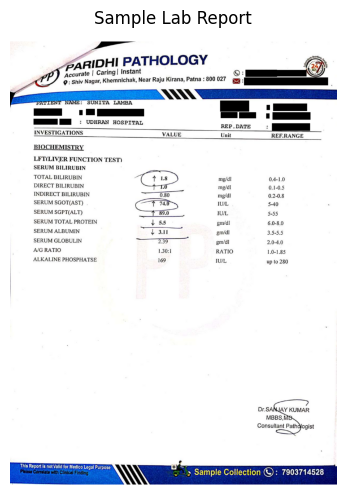

In [4]:
import cv2
from matplotlib import pyplot as plt

sample_image_path = os.path.join(extract_path, os.listdir(extract_path)[0])
image = cv2.imread(sample_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Sample Lab Report")
plt.show()


In [5]:
!pip install pytesseract
!sudo apt install tesseract-ocr

import pytesseract
import cv2
import os

def extract_text(image_path):
    img = cv2.imread(image_path)
    text = pytesseract.image_to_string(img)
    return text

image_paths = [os.path.join(extract_path, img)
               for img in os.listdir(extract_path)
               if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Total Images Found: {len(image_paths)}")
for path in image_paths[:5]:
    print(f"Processing {path}")
    text = extract_text(path)
    print(text[:300])
    print("="*50)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Total Images Found: 426
Processing /content/lab_reports_samples/lbmaske/BLR-0425-PA-0040326_Lab Report Sunita_27-04-2025_0131-15_PM@G.pdf_page_11.png
    
  
 
 

SUNITA LAMBA

ARIDHI PATHOLOGY

- PA :
urate | Caring| Instan
sw Nagar, Khemnichak, Near Raju Kirana, Patna : 800 027

SS

 

ee
HS MECSC«Ci‘iS:«CUD RRA’: HOSPITAL

INVESTIGATIONS

BIOCHEMISTRY

 

LFT(LIVER FUNCTION TEST)

SERUM BILIRUBIN
TOTAL BILIRUBIN
DIRECT BILIRUBIN
INDIRECT BILIR
Processing /content/lab_reports_samples/lbmaske/GUR-0425-PA-0051725_Q-DEVKI19.04.20250001compressed_250427_1059@F.pdf_page_47.png
  
 

Jhajjar Road, Bahadurgarh
The Skill To He ee ees
» Shilt To Heat
‘The Spinit Jo Care

Patient d ay SriNo. 129 Date [a
| __ EE |

 

SWASTIK ice 6

 

 

 

  
   
  
 

PHYSICAL EXAMINATION

In [13]:
import re

def parse_lab_report(text):
    results = []

    pattern = re.compile(r'([A-Za-z ()%]+)\s+([\d.]+(?:\.\d+)?)\s+([\d.]+-[\d.]+)\s*([a-zA-Z/%]+)?')

    for match in pattern.finditer(text):
        test_name = match.group(1).strip()

        try:
            test_value = float(match.group(2))
        except ValueError:
            print(f"Warning: Could not convert '{match.group(2)}' to float for test: {test_name}")
            continue

        reference_range = match.group(3)
        unit = match.group(4) if match.group(4) else ""

        ref_min, ref_max = map(float, reference_range.split("-"))
        out_of_range = not (ref_min <= test_value <= ref_max)

        results.append({
            "test_name": test_name,
            "test_value": str(test_value),
            "bio_reference_range": reference_range,
            "test_unit": unit,
            "lab_test_out_of_range": out_of_range
        })

    return results

In [14]:
all_results = []

for path in image_paths[:100]:
    print(f"extracting files: {os.path.basename(path)}")
    raw_text = extract_text(path)
    structured_data = parse_lab_report(raw_text)

    all_results.append({
        "file_name": os.path.basename(path),
        "is_success": True if structured_data else False,
        "data": structured_data
    })

extracting files: BLR-0425-PA-0040326_Lab Report Sunita_27-04-2025_0131-15_PM@G.pdf_page_11.png
extracting files: GUR-0425-PA-0051725_Q-DEVKI19.04.20250001compressed_250427_1059@F.pdf_page_47.png
extracting files: GUR-0425-PA-0056568_E-REPORTS_250427_1436@E.pdf_page_1.png
extracting files: CHE-0425-PA-0014115_Q-Chandruquery_250427_1853@F.pdf_page_33.png
extracting files: MUM-0125-PA-0001141_W2500438UNADKAT ASHWIN_27-04-2025_1002-19_AM.pdf_page_80.png
extracting files: GUR-0425-PA-0057745_Q-LABREPORTS_250428_1121@F.pdf_page_12.png
extracting files: GUR-0425-PA-0045348_Q-FINALBILLWITHDISCHARGEDOCUMENTS_250411_1130@F.pdf_page_79.png
extracting files: IND-0425-PA-0033745_SANKET CBC_27-04-2025_0431-24_PM@F.pdf_page_2.png
extracting files: GUR-0425-PA-0051757_Q-HEMANTDHALWAL19.04.20250001compressed_250427_1031@F.pdf_page_53.png
extracting files: BLR-0425-PA-0040652_LAB MERG_27-04-2025_1239-18_PM@E.pdf_page_2.png
extracting files: BLR-0425-PA-0042579_F-SARAFATHIMAPREAUTHREQUEST_250427_1545@G.

In [15]:
print(all_results)

[{'file_name': 'BLR-0425-PA-0040326_Lab Report Sunita_27-04-2025_0131-15_PM@G.pdf_page_11.png', 'is_success': False, 'data': []}, {'file_name': 'GUR-0425-PA-0051725_Q-DEVKI19.04.20250001compressed_250427_1059@F.pdf_page_47.png', 'is_success': True, 'data': [{'test_name': 'SPECIFIC GRAVITY', 'test_value': '1.03', 'bio_reference_range': '4.005-1.025', 'test_unit': 'PH', 'lab_test_out_of_range': True}]}, {'file_name': 'GUR-0425-PA-0056568_E-REPORTS_250427_1436@E.pdf_page_1.png', 'is_success': False, 'data': []}, {'file_name': 'CHE-0425-PA-0014115_Q-Chandruquery_250427_1853@F.pdf_page_33.png', 'is_success': True, 'data': [{'test_name': 'RISK FACTOR', 'test_value': '4.2', 'bio_reference_range': '2.5-5.0', 'test_unit': 'HE', 'lab_test_out_of_range': False}]}, {'file_name': 'MUM-0125-PA-0001141_W2500438UNADKAT ASHWIN_27-04-2025_1002-19_AM.pdf_page_80.png', 'is_success': False, 'data': []}, {'file_name': 'GUR-0425-PA-0057745_Q-LABREPORTS_250428_1121@F.pdf_page_12.png', 'is_success': False, 'da

In [30]:
import json

print(json.dumps(all_results[1], indent=2
))


{
                                               "file_name": "GUR-0425-PA-0051725_Q-DEVKI19.04.20250001compressed_250427_1059@F.pdf_page_47.png",
                                               "is_success": true,
                                               "data": [
                                                                                              {
                                                                                                                                             "test_name": "SPECIFIC GRAVITY",
                                                                                                                                             "test_value": "1.03",
                                                                                                                                             "bio_reference_range": "4.005-1.025",
                                                                                                                     

In [31]:

import json


for result in all_results:
  if result['is_success']:
    print(json.dumps(result, indent=2))


{
  "file_name": "GUR-0425-PA-0051725_Q-DEVKI19.04.20250001compressed_250427_1059@F.pdf_page_47.png",
  "is_success": true,
  "data": [
    {
      "test_name": "SPECIFIC GRAVITY",
      "test_value": "1.03",
      "bio_reference_range": "4.005-1.025",
      "test_unit": "PH",
      "lab_test_out_of_range": true
    }
  ]
}
{
  "file_name": "CHE-0425-PA-0014115_Q-Chandruquery_250427_1853@F.pdf_page_33.png",
  "is_success": true,
  "data": [
    {
      "test_name": "RISK FACTOR",
      "test_value": "4.2",
      "bio_reference_range": "2.5-5.0",
      "test_unit": "HE",
      "lab_test_out_of_range": false
    }
  ]
}
{
  "file_name": "IND-0425-PA-0033745_SANKET CBC_27-04-2025_0431-24_PM@F.pdf_page_2.png",
  "is_success": true,
  "data": [
    {
      "test_name": "POTASSIUM",
      "test_value": "4.11",
      "bio_reference_range": "3.5-5.3",
      "test_unit": "Tested",
      "lab_test_out_of_range": false
    }
  ]
}
{
  "file_name": "GUR-0425-PA-0052271_Q-RAMFEERPANDEY21.04.2025000

In [52]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import shutil, nest_asyncio
import traceback

nest_asyncio.apply()
app = FastAPI()

@app.post("/get-lab-tests")
async def get_lab_tests(file: UploadFile = File(...)):
    try:
        tmp = f"/content/{file.filename}"
        with open(tmp, "wb") as buf:
            shutil.copyfileobj(file.file, buf)
        text = extract_text(tmp)
        data = parse_lab_report(text)
        return JSONResponse({"is_success": True, "data": data})
    except Exception as e:
        traceback.print_exc()
        return JSONResponse({"is_success": False, "error": str(e)}, status_code=500)

In [56]:
!pip install fastapi uvicorn pyngrok nest_asyncio python-multipart opencv-python pytesseract

from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import os
import pytesseract
import cv2
import re
import nest_asyncio
from pyngrok import ngrok
import shutil

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

def extract_text(image_path):
    img = cv2.imread(image_path)
    text = pytesseract.image_to_string(img)
    return text

def parse_lab_report(text):
    result = []
    lines = text.split('\n')
    for line in lines:
        match = re.match(r"([A-Za-z ]+)\s+([\d.]+)\s+([A-Za-z/%]+)?\s+([\d.-]+)-([\d.-]+)", line)
        if match:
            name = match.group(1).strip()
            value = float(match.group(2))
            unit = match.group(3)
            low = float(match.group(4))
            high = float(match.group(5))
            result.append({
                "test_name": name,
                "value": value,
                "unit": unit,
                "bio_reference_range": f"{low}-{high}",
                "lab_test_out_of_range": value < low or value > high
            })
    return result

@app.post("/get-lab-tests")
async def get_lab_tests(file: UploadFile = File(...)):
    try:
        with open(file.filename, "wb") as buffer:
            shutil.copyfileobj(file.file, buffer)

        raw_text = extract_text(file.filename)
        structured_data = parse_lab_report(raw_text)
        os.remove(file.filename)

        return {
            "file_name": file.filename,
            "is_success": True,
            "data": structured_data
        }
    except Exception as e:
        return {"is_success": False, "error": str(e)}

nest_asyncio.apply()
public_url = ngrok.connect(8000)
print("🚀 Your FastAPI endpoint is:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-10' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    s

ERROR: Operation cancelled by user
🚀 Your FastAPI endpoint is: NgrokTunnel: "https://411b-34-16-198-81.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [5485]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [5485]


In [57]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)
print("🚀 FastAPI endpoint:", public_url)


🚀 FastAPI endpoint: NgrokTunnel: "https://317a-34-16-198-81.ngrok-free.app" -> "http://localhost:8000"


In [58]:
@app.post("/get-lab-tests")
async def get_lab_tests(file: UploadFile = File(...)):
    with open(file.filename, "wb") as buffer:
        buffer.write(await file.read())
    try:
        raw_text = extract_text(file.filename)
        structured_data = parse_lab_report(raw_text)
        os.remove(file.filename)

        return {
            "file_name": file.filename,
            "is_success": True,
            "data": structured_data
        }
    except Exception as e:
        os.remove(file.filename)
        return {"is_success": False, "error": str(e)}

nest_asyncio.apply()

from threading import Thread

def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

Thread(target=run).start()

public_url = ngrok.connect(8000)
print(f"🚀 Your FastAPI app is live at: {public_url}/get-lab-tests")

INFO:     Started server process [5485]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


🚀 Your FastAPI app is live at: NgrokTunnel: "https://0b1e-34-16-198-81.ngrok-free.app" -> "http://localhost:8000"/get-lab-tests


In [36]:
!pip install pyngrok -q
from pyngrok import ngrok


In [37]:
ngrok.set_auth_token("2wOMfzpNA7pZYKozp69DOyKcxGA_2sKdcAUtQwtmj9owFvBSF")


In [59]:
public_url = ngrok.connect(8000)
print("🚀 Public URL:", public_url)


🚀 Public URL: NgrokTunnel: "https://6c74-34-16-198-81.ngrok-free.app" -> "http://localhost:8000"


In [63]:
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))

import requests

ngrok_url = "https://317a-34-16-198-81.ngrok-free.app/get-lab-tests"

files = {'file': open(filename, 'rb')}
response = requests.post(ngrok_url, files=files)

print(response.json())


Saving CHE-0425-PA-0014111_SOORYA PRAKASH INVESTIGATIONS_compressed_27-04-2025_0130-33_PM.pdf_page_5.png to CHE-0425-PA-0014111_SOORYA PRAKASH INVESTIGATIONS_compressed_27-04-2025_0130-33_PM.pdf_page_5.png
INFO:     34.16.198.81:0 - "POST /get-lab-tests HTTP/1.1" 200 OK
{'file_name': 'CHE-0425-PA-0014111_SOORYA PRAKASH INVESTIGATIONS_compressed_27-04-2025_0130-33_PM.pdf_page_5.png', 'is_success': True, 'data': [{'test_name': 'Bilirubin Direct H', 'value': 5.99, 'unit': 'mg/dL', 'bio_reference_range': '0.0-0.5', 'lab_test_out_of_range': True}, {'test_name': 'Bilirubin Indirect H', 'value': 1.72, 'unit': 'mg/dL', 'bio_reference_range': '0.1-1.0', 'lab_test_out_of_range': True}, {'test_name': 'Alkaline Phosphatase H', 'value': 152.0, 'unit': 'U/L', 'bio_reference_range': '40.0-150.0', 'lab_test_out_of_range': True}, {'test_name': 'Gamma Glutamyl Transferase H', 'value': 177.0, 'unit': 'U/L', 'bio_reference_range': '0.0-55.0', 'lab_test_out_of_range': True}, {'test_name': 'Albumin', 'value

In [64]:

import json

def pretty_print_json(json_data):
    print(json.dumps(json_data, indent=4))

pretty_print_json(response.json())


{
    "file_name": "CHE-0425-PA-0014111_SOORYA PRAKASH INVESTIGATIONS_compressed_27-04-2025_0130-33_PM.pdf_page_5.png",
    "is_success": true,
    "data": [
        {
            "test_name": "Bilirubin Direct H",
            "value": 5.99,
            "unit": "mg/dL",
            "bio_reference_range": "0.0-0.5",
            "lab_test_out_of_range": true
        },
        {
            "test_name": "Bilirubin Indirect H",
            "value": 1.72,
            "unit": "mg/dL",
            "bio_reference_range": "0.1-1.0",
            "lab_test_out_of_range": true
        },
        {
            "test_name": "Alkaline Phosphatase H",
            "value": 152.0,
            "unit": "U/L",
            "bio_reference_range": "40.0-150.0",
            "lab_test_out_of_range": true
        },
        {
            "test_name": "Gamma Glutamyl Transferase H",
            "value": 177.0,
            "unit": "U/L",
            "bio_reference_range": "0.0-55.0",
            "lab_test_out_of_

In [68]:
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))

import requests

ngrok_url = "https://317a-34-16-198-81.ngrok-free.app/get-lab-tests"

files = {'file': open(filename, 'rb')}
response = requests.post(ngrok_url, files=files)

print(response.json())


Saving KOL-0425-PA-0004210_REPORT_27-04-2025_0729-34_PM.pdf_page_7.png to KOL-0425-PA-0004210_REPORT_27-04-2025_0729-34_PM.pdf_page_7.png
INFO:     34.16.198.81:0 - "POST /get-lab-tests HTTP/1.1" 200 OK
{'file_name': 'KOL-0425-PA-0004210_REPORT_27-04-2025_0729-34_PM.pdf_page_7.png', 'is_success': True, 'data': [{'test_name': 'MONOCYTES', 'value': 3.0, 'unit': '%', 'bio_reference_range': '2.0-5.0', 'lab_test_out_of_range': False}, {'test_name': 'BASOPHILS', 'value': 0.0, 'unit': '%', 'bio_reference_range': '0.0-1.0', 'lab_test_out_of_range': False}]}


In [69]:

import json

def pretty_print_json(json_data):
    print(json.dumps(json_data, indent=4))

pretty_print_json(response.json())


{
    "file_name": "KOL-0425-PA-0004210_REPORT_27-04-2025_0729-34_PM.pdf_page_7.png",
    "is_success": true,
    "data": [
        {
            "test_name": "MONOCYTES",
            "value": 3.0,
            "unit": "%",
            "bio_reference_range": "2.0-5.0",
            "lab_test_out_of_range": false
        },
        {
            "test_name": "BASOPHILS",
            "value": 0.0,
            "unit": "%",
            "bio_reference_range": "0.0-1.0",
            "lab_test_out_of_range": false
        }
    ]
}
